# Task 1

**Problem:** select 3 models to predict NBA player salary
1. linear regression model
2. KNN regression model
3. Random forest / Support vector machine

**Data:** NBA_Train.csv, NBA_Test.csv

**Metadata:** https://stats.nba.com/help/glossary/

**Resonse variable:** Salary

**Performance metric:** Root mean squared error (RMSE) < 4.1 ($Millions) --  at least 2/3 models have to achieve this goal




# Data processing and EDA

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [33]:
NBA_train = pd.read_csv('NBA_Train.csv')
NBA_test = pd.read_csv('NBA_Test.csv')

In [34]:
# NBA_train.info()
NBA_train.describe()

,Train_ID,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.00000
mean,63.500000,6.784165,26.682540,69.460317,1809.015873,14.964286,0.542540,5.154762,15.116667,10.136508,14.457143,1.587302,1.522222,13.486508,19.989683,107.182540,106.865079,2.337302,1.839683,4.18254
std,36.517119,5.647912,4.080492,11.433040,703.561511,4.306320,0.045747,3.825422,6.018475,4.626646,9.821083,0.617606,1.359464,4.156602,4.962094,7.589889,3.679898,2.639507,1.178683,3.40273
min,1.000000,0.111444,19.000000,40.000000,393.000000,6.300000,0.446000,1.000000,6.200000,4.100000,2.100000,0.200000,0.000000,7.200000,9.300000,88.000000,97.000000,-0.900000,0.000000,-0.10000
25%,32.250000,2.385205,23.000000,62.000000,1290.250000,12.425000,0.510000,2.125000,10.125000,6.025000,7.025000,1.125000,0.600000,10.400000,16.425000,102.000000,104.000000,0.600000,0.900000,1.72500
50%,63.500000,4.500000,26.000000,72.500000,1859.000000,14.000000,0.540000,3.700000,13.800000,9.200000,11.250000,1.500000,1.100000,12.500000,19.100000,107.000000,107.000000,1.650000,1.600000,3.15000
75%,94.750000,9.591416,29.000000,79.000000,2405.000000,16.750000,0.567750,7.300000,19.200000,13.900000,19.975000,2.000000,1.875000,15.500000,23.275000,112.000000,110.000000,3.300000,2.475000,5.57500
max,126.000000,22.970500,37.000000,82.000000,3122.000000,29.800000,0.730000,17.500000,32.100000,22.300000,44.300000,3.800000,7.400000,28.800000,33.000000,130.000000,115.000000,14.800000,6.400000,19.20000


In [24]:
NBA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Train_ID  126 non-null    int64  
 1   SALARY    126 non-null    float64
 2   POSITION  126 non-null    object 
 3   TEAM      126 non-null    object 
 4   Age       126 non-null    int64  
 5   Games     126 non-null    int64  
 6   Minutes   126 non-null    int64  
 7   PER       126 non-null    float64
 8   TS        126 non-null    float64
 9   ORB       126 non-null    float64
 10  DRB       126 non-null    float64
 11  TRB       126 non-null    float64
 12  AST       126 non-null    float64
 13  STL       126 non-null    float64
 14  BLK       126 non-null    float64
 15  TOV       126 non-null    float64
 16  USG       126 non-null    float64
 17  ORtg      126 non-null    int64  
 18  DRtg      126 non-null    int64  
 19  OWS       126 non-null    float64
 20  DWS       126 non-null    float6

In [26]:
# checking missing values
NBA_train.isnull().sum()

Train_ID    0
SALARY      0
POSITION    0
TEAM        0
Age         0
Games       0
Minutes     0
PER         0
TS          0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
USG         0
ORtg        0
DRtg        0
OWS         0
DWS         0
WS          0
dtype: int64

In [29]:
NBA_test.isnull().sum()

Test_ID     0
SALARY      0
POSITION    0
TEAM        0
Age         0
Games       0
Minutes     0
PER         0
TS          0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
USG         0
ORtg        0
DRtg        0
OWS         0
DWS         0
WS          0
dtype: int64

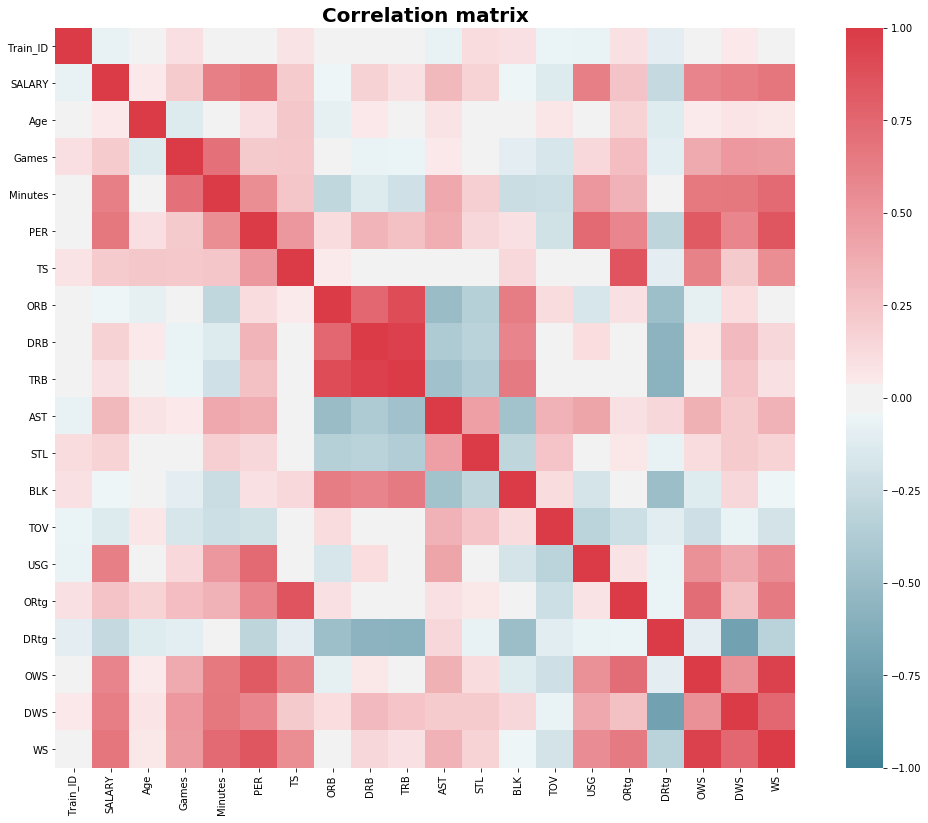

In [40]:
fig, ax = plt.subplots()

cmap = sns.diverging_palette(220, 10, as_cmap= True)
sns.heatmap(NBA_train.corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=20)
plt.tight_layout()
fig.set_size_inches(15,15)
# plt.xticks(np.arange(0.5,len(space),1),space,fontsize=20)
# plt.yticks(np.arange(0.5,len(space),1),space,fontsize=20)

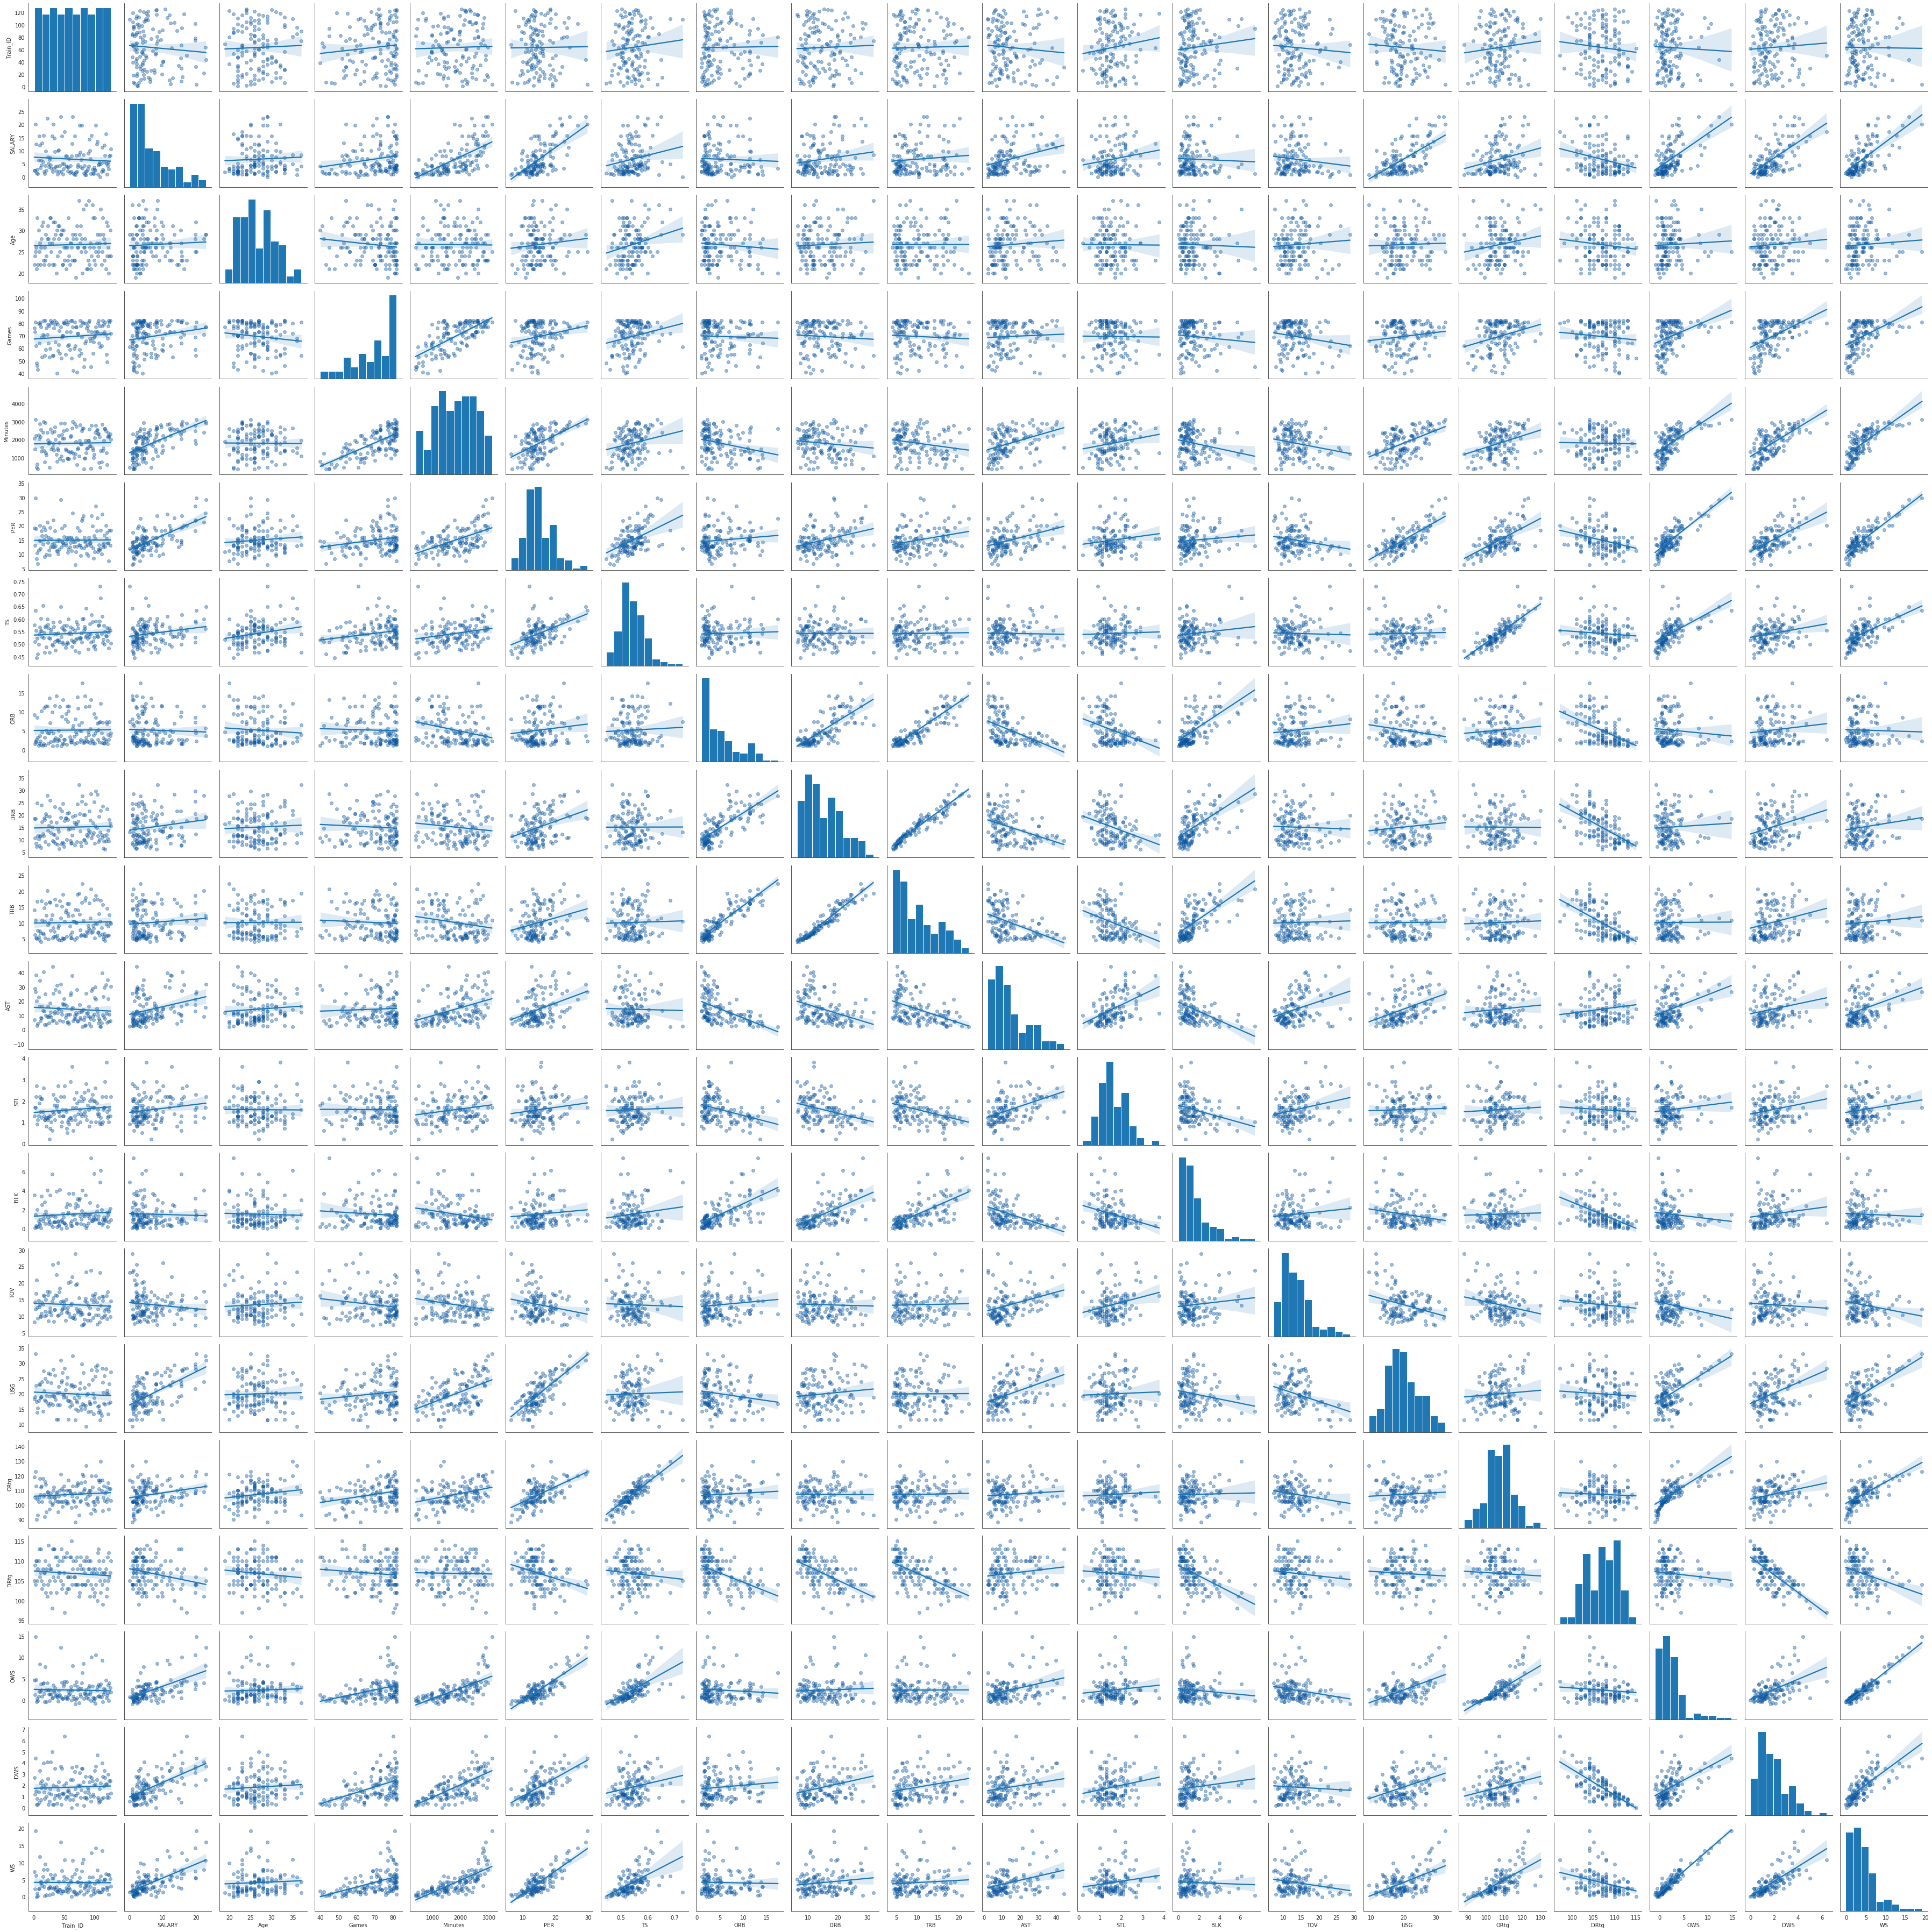

In [43]:
with sns.axes_style('white'):
    g=sns.pairplot(NBA_train, kind='reg',
    plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha':
    0.4}})
plt.tight_layout()